In [33]:
from torch.utils.data import Dataset
import torch
import numpy as np
import h5py
import pytorch_lightning as pl
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
import torch
import json
from torch.utils.data import DataLoader
import os

def load_model_data(SAVEPATH):
    for filename in os.listdir(SAVEPATH+"checkpoints"):
        f = os.path.join(SAVEPATH, filename)
        FILENAME = "checkpoints/"+filename
    config = json.load(open(SAVEPATH+'config.json'))
    checkpoint = torch.load(SAVEPATH+FILENAME, map_location=torch.device('cpu'))
    wrapers = __import__("wrapers")
    model = getattr(wrapers, config["MODEL_WRAPER"])(config)
    model.load_state_dict(checkpoint['state_dict'])
    ld = __import__("load_data")
    data = getattr(ld, config["DATA_LOADER"])(config, data_type = "valid")

    f = h5py.File(config["PATH_TRAIN"], 'r')
    parameters = f["valid"]["parameters"]
    return model, data, parameters

SAVEPATH_u2c0b50 = "/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/saves/U2c0_b50_gmax_10x10/"
SAVEPATH_u3c0b50 = "/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/saves/U3c0_b50_gmax_10x10/"
SAVEPATH_u2c0b10b50 = "/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/saves/U2c0_b10b50_gmax_10x10/"

# SAVEPATH = SAVEPATH_u2c0b50+"save_GNN_basis_BS1_2024-04-01/weirdfalse/"
# model_gnn_1, validation_gnn_1 = load_model_data(SAVEPATH)

# SAVEPATH = SAVEPATH_u2c0b50+"save_GNN_basis_BS10_2024-04-01/version_0/"
# model_gnn_2, validation_set_2 = load_model_data(SAVEPATH)

SAVEPATH = SAVEPATH_u2c0b10b50+"save_GNN_basis_BS10_2024-04-01/version_0/"
model_gnn_3, validation_gnn_3, parameters_gnn_3 = load_model_data(SAVEPATH)

SAVEPATH = SAVEPATH_u2c0b10b50+"save_auto_encoder_BS10_2024-04-01/version_0/"
model_ae_1, validation_ae_1, parameters_ae_1 = load_model_data(SAVEPATH)



/gpfs/data/fs72150/springerd/Projects/LuttingerWard_from_ML/data/U2c0_b10b50_gmax_10x10.hdf5


3.9191919191919196 5.858585858585858 50.0


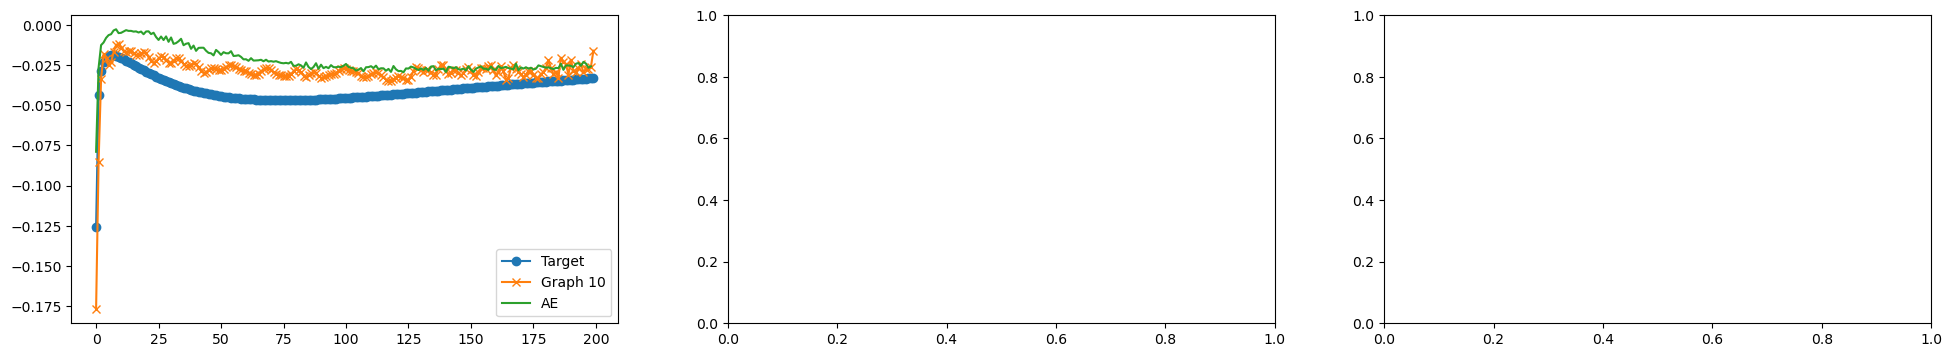

In [40]:
validation_gnn = validation_gnn_3
validation_ae = validation_ae_1

random_sample = int(np.random.rand()*len(validation_gnn))
target_sample_gnn = validation_gnn[random_sample]["target"]
sample_gnn = validation_gnn[random_sample]
# Adding batch-dimension which is absent without using a dataloader!
in_sample_gnn = {}
in_sample_gnn["edge_index"] = sample_gnn["edge_index"][None]
in_sample_gnn["node_feature"] = sample_gnn["node_feature"][None]
in_sample_gnn["vectors"] = sample_gnn["vectors"][None]

random_sample = int(np.random.rand()*len(validation_ae))
target_sample_ae = validation_ae[random_sample][0]
in_sample_ae = validation_ae[random_sample][0]

beta = parameters_ae_1[random_sample][0]
ek = parameters_ae_1[random_sample][1]
vk = parameters_ae_1[random_sample][2]

pred_ae_1 = model_ae_1.model(in_sample_ae)
# pred_gnn_1 = model_gnn_1.model(in_sample_gnn)
# pred_gnn_2 = model_gnn_2.model(in_sample_gnn)
pred_gnn_3 = model_gnn_3.model(in_sample_gnn)

with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    fig,ax = plt.subplots(1,3, figsize=(24,4))
    ax[0].plot(target_sample_gnn[:].cpu(), '-o', label="Target")
    ax[0].plot(pred_gnn_3[:].detach().numpy(), '-x', label="Graph 10")
    ax[0].plot(pred_ae_1[200:399].detach().numpy(), label="AE")
    ax[0].legend()
    # ax[0].set_title(ek, vk, beta)
    # ax[1].plot(in_sample_gnn["node_feature"][0,0,200:399], '-', label='Graph input')
    # ax[2].plot(in_sample_gnn["node_feature"][0,0,400:599], '-', label='Graph input')

    # ax[1].plot(in_sample[0], label='AE input')

print(ek, vk, beta)


In [32]:
print(parameters_ae_1[:])

[[10.         -4.          5.32663317]
 [10.         -4.          5.37688442]
 [10.         -4.          5.42713568]
 ...
 [10.          4.          6.23115578]
 [10.          4.          6.28140704]
 [10.          4.          6.33165829]]


In [ ]:
from tbparse import SummaryReader
log_dir = "../saves/save_GreenGNN_2023-12-17/8xA40/events.out.tfevents.1702853627.n3066-019.4045655.0"
reader = SummaryReader(log_dir)
df = reader.scalars
train_loss_gnn = df[df['tag'] == 'train_loss'].value
val_loss_gnn = df[df['tag'] == 'val_loss'].value
log_dir = "../saves/UGrid/save_GreenGNN_2023-12-19/version_1/events.out.tfevents.1702998756.n3067-009.60366.0"
reader = SummaryReader(log_dir)
df = reader.scalars
train_loss_gnn_ugrid = df[df['tag'] == 'train_loss'].value
val_loss_gnn_ugrid = df[df['tag'] == 'val_loss'].value

log_dir = "../saves/save_auto_encoder_2023-12-17/128xCPU/events.out.tfevents.1702849807.l53.vsc.xcat.1616104.0"
reader = SummaryReader(log_dir)
df = reader.scalars
train_loss_ae = df[df['tag'] == 'train_loss'].value
val_loss_ae = df[df['tag'] == 'val_loss'].value
log_dir = "../saves/save_auto_encoder_conv_2023-12-18/128xCPU/events.out.tfevents.1702890026.l51.vsc.xcat.146919.0"
reader = SummaryReader(log_dir)
df = reader.scalars
train_loss_ae_conv = df[df['tag'] == 'train_loss'].value
val_loss_ae_conv = df[df['tag'] == 'val_loss'].value

with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    (fig,ax) = plt.subplots(1,2, figsize=(15,9))
    ax[0].plot(np.array(train_loss_ae[-100:]), label="Linear AE step :100")
    ax[0].plot(np.array(train_loss_ae_conv[-100:]), label="Conv AE step :100")
    ax[0].plot(np.array(train_loss_gnn[:40]), label="GNN train 0:40")
    ax[0].plot(np.array(train_loss_gnn[-100:]), label="GNN train :100")
    ax[0].plot(np.array(train_loss_gnn_ugrid[-100:]), label="GNN_ugrid train :100")
    ax[0].legend()
    ax[0].set_title("Training loss on respective dataset")
    ax[1].plot(np.array(val_loss_ae), label="Linear AE val loss")
    ax[1].plot(np.array(val_loss_ae_conv), label="Conv AE val loss")
    ax[1].plot(np.array(val_loss_gnn), label="GNN val loss")
    # ax[1].plot(np.array(val_loss_gnn_ugrid), label="GNN_ugrid val loss")
    ax[1].legend()
    ax[1].set_title("Validation loss on batch1.hdf5 dataset")


2024-02-21 12:05:45.641557: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ValueError: File or directory not found: ../saves/UGrid/save_GreenGNN_2023-12-19/version_1/events.out.tfevents.1702998756.n3067-009.60366.0

In [ ]:
# # %pwd
# # %ls
# # from google.colab import drive
# # drive.mount('/content/drive/')
# # %cd ..//saves/save_GreenGNN_2023-12-14/version_0
# # %pwd
# # %ls
# %load_ext tensorboard/
# !tensorboard --logdir ../saves/save_GreenGNN_2023-12-17/version_3

# from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
# event_acc = EventAccumulator(evtf)
# event_acc.Reload()


# # def parse_tensorboard(path, scalars):
# #     """returns a dictionary of pandas dataframes for each requested scalar"""
# #     ea = event_accumulator.EventAccumulator(
# #         path,
# #         size_guidance={event_accumulator.SCALARS: 0},
# #     )
# #     print(ea)
# #     _absorb_print = ea.Reload()
# #     # make sure the scalars are in the event accumulator tags
# #     # assert all(
# #     #     s in ea.Tags()["tensors"] for s in scalars
# #     # ), "some scalars were not found in the event accumulator"
# #     # return {k: pd.DataFrame(ea.Tensors(k)) for k in scalars}

# # print(parse_tensorboard("../saves/saves/save_GreenGNN_2023-12-14/version_0/events.out.tfevents.1702573757.n3066-015.3397121.0", None))

In [ ]:
%load_ext tensorboard
%tensorboard --logdir ../saves/saves/save_GreenGNN_2023-12-14/version_0/
# notebook.display(port=6006, height=1000) 
# # # !pip install jupyter-tensorboard
# from tensorboard import notebook
# notebook.list() # View open TensorBoard instances
# notebook.display(port=6006, height=1000) 
# !kill 1543469